# Proyek UAS PMDPM

### Inisialisasi

Bagian berikut berisi import library yang dibutuhkan

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

from sklearn.feature_selection import SelectKBest, SelectFromModel, SelectPercentile
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

### Data Loading

Bagian berikut berisi proses data loading, menampilkan 20 baris data teratas

In [3]:
df_housing = pd.read_csv("./paris_housing2000.csv")
df_housing.head(20)

,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,61648,3,4,1995,N,Y,3114,1258,264,Y,9,10313.5,Basic
1,33633,9,1,2011,N,Y,9390,6219,922,N,9,13229.1,Basic
2,80623,1,4,2003,Y,N,2239,2795,951,Y,7,14431.3,Basic
3,8862,6,2,1990,N,N,6861,5769,442,N,5,15488.0,Basic
4,27008,6,9,1992,Y,Y,6618,7045,939,Y,10,16799.2,Basic
5,82480,5,2,2010,Y,N,4426,5336,911,N,4,17071.0,Basic
6,26761,4,3,1990,Y,N,6022,8521,391,Y,3,17363.0,Basic
7,62932,6,3,2000,N,N,2325,6230,536,N,9,18985.0,Basic
8,91418,2,2,2020,N,Y,8598,3119,268,N,10,19638.0,Basic
9,29281,7,6,1995,N,Y,2675,6452,724,Y,2,19788.5,Basic


### Data Cleansing

Bagian berikut berisi proses pembersihan data (missing values handling)

In [4]:
df_housing.isna().sum()

cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
category             0
dtype: int64

In [5]:
cat_cols = ['isNewBuilt', 'hasStormProtector', 'hasStorageRoom']

df_housing = pd.get_dummies(df_housing, columns=cat_cols, drop_first = True)
df_housing.rename(columns={'isNewBuilt_Y': 'isNewBuilt', 'hasStormProtector_Y': 'hasStormProtector', 'hasStorageRoom_Y': 'hasStorageRoom'}, inplace=True)
df_housing.head(20)

,cityCode,cityPartRange,numPrevOwners,made,basement,attic,garage,hasGuestRoom,price,category,isNewBuilt,hasStormProtector,hasStorageRoom
0,61648,3,4,1995,3114,1258,264,9,10313.5,Basic,False,True,True
1,33633,9,1,2011,9390,6219,922,9,13229.1,Basic,False,True,False
2,80623,1,4,2003,2239,2795,951,7,14431.3,Basic,True,False,True
3,8862,6,2,1990,6861,5769,442,5,15488.0,Basic,False,False,False
4,27008,6,9,1992,6618,7045,939,10,16799.2,Basic,True,True,True
5,82480,5,2,2010,4426,5336,911,4,17071.0,Basic,True,False,False
6,26761,4,3,1990,6022,8521,391,3,17363.0,Basic,True,False,True
7,62932,6,3,2000,2325,6230,536,9,18985.0,Basic,False,False,False
8,91418,2,2,2020,8598,3119,268,10,19638.0,Basic,False,True,False
9,29281,7,6,1995,2675,6452,724,2,19788.5,Basic,False,True,True


In [6]:
label_encoder = LabelEncoder()

df_housing['category'] = label_encoder.fit_transform(df_housing.loc[:, 'category'])
df_housing.head(20)

,cityCode,cityPartRange,numPrevOwners,made,basement,attic,garage,hasGuestRoom,price,category,isNewBuilt,hasStormProtector,hasStorageRoom
0,61648,3,4,1995,3114,1258,264,9,10313.5,0,False,True,True
1,33633,9,1,2011,9390,6219,922,9,13229.1,0,False,True,False
2,80623,1,4,2003,2239,2795,951,7,14431.3,0,True,False,True
3,8862,6,2,1990,6861,5769,442,5,15488.0,0,False,False,False
4,27008,6,9,1992,6618,7045,939,10,16799.2,0,True,True,True
5,82480,5,2,2010,4426,5336,911,4,17071.0,0,True,False,False
6,26761,4,3,1990,6022,8521,391,3,17363.0,0,True,False,True
7,62932,6,3,2000,2325,6230,536,9,18985.0,0,False,False,False
8,91418,2,2,2020,8598,3119,268,10,19638.0,0,False,True,False
9,29281,7,6,1995,2675,6452,724,2,19788.5,0,False,True,True


### Data Visualization

Memvisualisasikan data dari 5 fitur pilihan

<Axes: title={'center': 'Kategori Rumah'}>

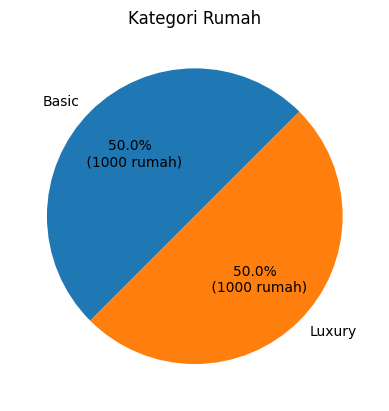

In [7]:
category_count = df_housing['category'].value_counts()
category_count.plot(kind='pie', title='Kategori Rumah', ylabel='', labels=['Basic', 'Luxury'], startangle = 45, autopct=lambda p: '{:.1f}% \n ({:.0f} rumah)'.format(p,(p/100)*category_count.sum()))

<Axes: title={'center': 'Jenis Bangunan'}>

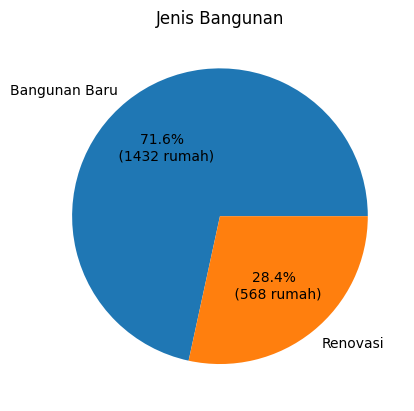

In [8]:
isNewBuilt_count = df_housing['isNewBuilt'].value_counts()
isNewBuilt_count.plot(kind='pie', title='Jenis Bangunan', ylabel='', labels=['Bangunan Baru', 'Renovasi'], autopct=lambda p: '{:.1f}% \n ({:.0f} rumah)'.format(p,(p/100)*isNewBuilt_count.sum()))

<Axes: title={'center': 'Persebaran Rumah Berdasarkan Tahun Dibangun'}, xlabel='Tahun Rumah Dibangun', ylabel='Jumlah Rumah'>

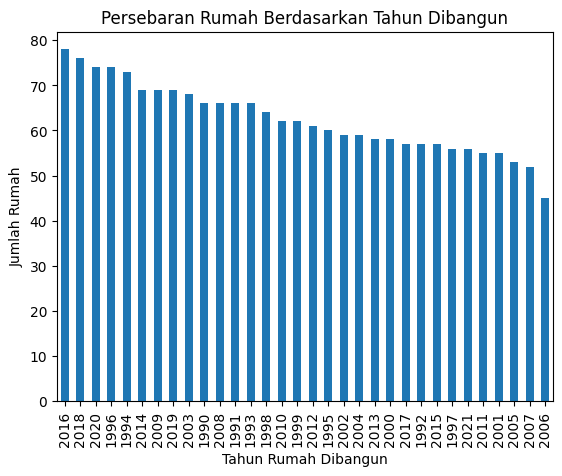

In [9]:
buildYear_count = df_housing['made'].value_counts(dropna=False)
buildYear_count.plot(kind='bar', title='Persebaran Rumah Berdasarkan Tahun Dibangun', xlabel='Tahun Rumah Dibangun', ylabel='Jumlah Rumah')

<Axes: title={'center': 'Persebaran Rumah Berdasarkan Jumlah Pemilik Sebelumnya'}, xlabel='Jumlah Pemilik Sebelumnya', ylabel='Jumlah Rumah'>

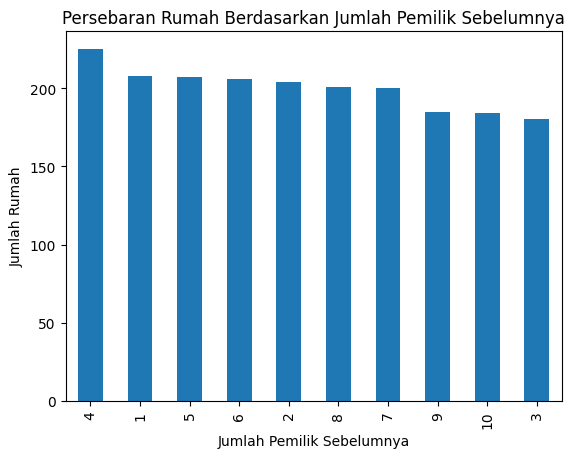

In [10]:
buildYear_count = df_housing['numPrevOwners'].value_counts(dropna=False)
buildYear_count.plot(kind='bar', title='Persebaran Rumah Berdasarkan Jumlah Pemilik Sebelumnya', xlabel='Jumlah Pemilik Sebelumnya', ylabel='Jumlah Rumah')

In [11]:
df_house_buildYear = df_housing.groupby(by='made').sum().reset_index()

fig = px.line(df_house_buildYear, x='made', y='price')
fig.update_layout(title='Persebaran Rumah Berdasarkan Harga dan Tahun Rumah Dibangun')
fig.update_traces(hovertemplate='Tahun %{x}: Harga %{y}')
fig.update_xaxes(title="Tahun Rumah Dibangun", showline=True, linewidth=1, linecolor='white', showgrid=False)
fig.update_yaxes(title="Harga", showline=True, linewidth=1, linecolor='white', showgrid=False)
fig.show()

### Deskripsi Data Visualization
1. Pada visualisasi kategori rumah, terlihat bahwa persebaran rumah berdasarkan kategorinya berjumlah seimbang.
2. Pada visualisasi jenis bangunan, terlihat bahwa mayoritas data rumah merupakan bangunan baru.
3. Pada visualisasi persebaran rumah berdasarkan tahun dibangun, terlihat bahwa mayoritas rumah dibangun pada tahun 2016 dan sedikit rumah yang dibangun pada tahun 2006.
3. Pada visualisasi persebaran rumah berdasarkan jumlah pemilik sebelumnya, terlihat bahwa mayoritas rumah pernah dimiliki 4 orang dan sedikit rumah yang pernah dimiliki 3 orang.
4. Berdasarkan visualisasi persebaran rumah berdasarkan harga dan tahun rumah dibangun, terlihat bahwa harga rumah tertinggi adalah 211.1572M pada rumah yang dibangun tahun 1996 dan harga terendah adalah 89.15345M pada pada rumah yang dibangun tahun 1992.

### Modelling

Menggunakan Pipeline untuk modelling dan grid search cross-validation untuk pemilihan model terbaik. Menggunakan Stratified K-fold Cross Validation dengan nilai k=5. Pipeline terdiri atas data scaling, feature selection, dan classifier.

>Step data scaling untuk membandingkan perlunya data scaling atau tidak. Menggunakan tiga nilai pada parameter grid yaitu: [None,Scaler1,Scaler2] Scaler yang digunakan antara lain MinMax, Standard, atau Robust.

>Step feature selection untuk membandingkan metode feature selection yang digunakan. Menggunakan tiga metode pada parameter grid yaitu: [None,Selector1,Selector2]. Metode yang digunakan merupakan jenis statistik univariat (antara SelectKBest atau SelectPercentile) dan SelectFromModel (antara menggunakan tree-based model atau linear model). 

>Step classifier untuk membandingkan algoritme classifier. Menggunakan 4 algoritme pembelajaran mesin yaitu Random Forest, Gradient Boosting Classifier, Logistic Regression, dan SVM. Eksplorasi pengaturan parameter yang ada pada algoritme yang digunakan, tidak terbatas pada 1-2 parameter saja supaya optimal (selain random_state). Dilakukan bereksperimen untuk parameter seperti n_estimators, max_depth untuk tree-based classifier; C untuk Logistic Regression; dan C, gamma, serta kernel untuk SVM agar mendapat akurasi terbaik.

>Menampilkan best estimator dan nilai best score dari grid-search cross-validation. Fit best estimator pada train set kemudian ujikan pada test set dengan fungsi score.

In [11]:
x = df_housing.drop('category', axis=1)
y = df_housing['category']

x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size=0.25, random_state=0)

In [12]:
pipe = Pipeline([('data_scaling', StandardScaler()),
                ('feature_selection', SelectKBest()),
                ('classification', GradientBoostingClassifier())])

param_grid = [{'data_scaling' : [None, MinMaxScaler(), StandardScaler()],
               'feature_selection' : [None, SelectKBest(k=5)]
              },
              {'data_scaling' : [None, MinMaxScaler(), StandardScaler()],
               'feature_selection' : [None, SelectKBest(k=5)],
               'classification': [RandomForestClassifier()],
               'classification__random_state' : [0, 42],
               'classification__n_estimators' : [10, 100, 1000],
               'classification__max_depth' : [4, 5, 6, 7, 8]
              },
              {'data_scaling' : [None, MinMaxScaler(), StandardScaler()],
               'feature_selection' : [None, SelectKBest(k=5)],
               'classification': [GradientBoostingClassifier()],
               'classification__n_estimators' : [10, 100, 1000],
               'classification__max_depth' : [4, 5, 6, 7, 8]
              },
              {'data_scaling' : [None, MinMaxScaler(), StandardScaler()],
               'feature_selection' : [None, SelectKBest(k=5)],
               'classification': [LogisticRegression()],
               'classification__max_iter': [1000, 2000, 3000],
               'classification__C' : [0.001, 0.01, 0.1, 1, 10, 100]
              },
              {'data_scaling' : [None, MinMaxScaler(), StandardScaler()],
               'feature_selection' : [None, SelectKBest(k=5)],
               'classification': [SVC()],
               'classification__C' : [0.001, 0.01, 0.1, 1, 10, 100],
               'classification__gamma' : [1, 0.1, 0.01, 0.001],
               'classification__kernel' : ['rbf', 'sigmoid']
              },    
              {'data_scaling' : [None, MinMaxScaler(), StandardScaler()],
               'feature_selection' : [SelectFromModel(RandomForestClassifier(random_state = 0, n_estimators = 10, max_depth = 4))]
              },
              {'data_scaling' : [None, MinMaxScaler(), StandardScaler()],
               'feature_selection' : [SelectFromModel(RandomForestClassifier(random_state = 0, n_estimators = 10, max_depth = 4))],
               'classification': [RandomForestClassifier()],
               'classification__random_state' : [0, 42],
               'classification__n_estimators' : [10, 100, 1000],
               'classification__max_depth' : [4, 5, 6, 7, 8]
              },
              {'data_scaling' : [None, MinMaxScaler(), StandardScaler()],
               'feature_selection' : [SelectFromModel(RandomForestClassifier(random_state = 0, n_estimators = 10, max_depth = 4))],
               'classification': [GradientBoostingClassifier()],
               'classification__n_estimators' : [10, 100, 1000],
               'classification__max_depth' : [4, 5, 6, 7, 8]
              },
              {'data_scaling' : [None, MinMaxScaler(), StandardScaler()],
               'feature_selection' : [SelectFromModel(RandomForestClassifier(random_state = 0, n_estimators = 10, max_depth = 4))],
               'classification': [LogisticRegression()],
               'classification__max_iter': [1000, 2000, 3000],
               'classification__C' : [0.001, 0.01, 0.1, 1, 10, 100]
              },
              {'data_scaling' : [None, MinMaxScaler(), StandardScaler()],
               'feature_selection' : [SelectFromModel(RandomForestClassifier(random_state = 0, n_estimators = 10, max_depth = 4))],
               'classification': [SVC()],
               'classification__C' : [0.001, 0.01, 0.1, 1, 10, 100],
               'classification__gamma' : [1, 0.1, 0.01, 0.001],
               'classification__kernel' : ['rbf', 'sigmoid']  
              }
             ]

In [13]:
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=skfold).fit(x_train, y_train)

print('Best Estimator Grid Search\t: {}'.format(grid_search.best_estimator_))
print('Best Score Grid Search\t: {}'.format(grid_search.best_score_))

Best Estimator Grid Search	: Pipeline(steps=[('data_scaling', None), ('feature_selection', SelectKBest(k=5)),
                ('classification',
                 RandomForestClassifier(max_depth=4, random_state=42))])
Best Score Grid Search	: 0.9286666666666668


In [14]:
grid_search.best_estimator_.fit(x_train, y_train)
print('Best Score\t: {}'.format(grid_search.score(x_test, y_test)))

Best Score	: 0.938


### Evaluasi Model

Bagian berikut berisi evaluasi model menggunakan classification report dan skor AUC. Menampilkan classification report dan AUC dari best estimator yang diperoleh!

In [15]:
grid_search_pred = grid_search.predict(x_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, grid_search_pred))

Confusion Matrix:
 [[254   0]
 [ 31 215]]


In [22]:
print(classification_report(y_test, grid_search_pred, target_names=['Basic', 'Luxury']))

              precision    recall  f1-score   support

       Basic       0.89      1.00      0.94       254
      Luxury       1.00      0.87      0.93       246

    accuracy                           0.94       500
   macro avg       0.95      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500



In [17]:
roc_auc_score(y_test, grid_search.best_estimator_.predict_proba(x_test)[:,1])

0.9721688752320593

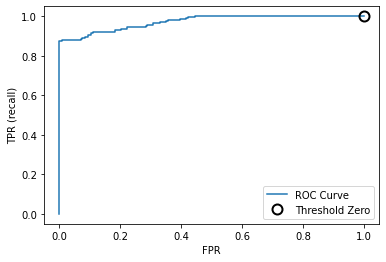

In [18]:
fpr, tpr, thresholds = roc_curve(y_test, grid_search.best_estimator_.predict_proba(x_test)[:,1])

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
        label='Threshold Zero', fillstyle='none', c='k', mew=2)
plt.legend(loc=4)

### Laporan Proyek

#### Tentang DataSet
Ini adalah kumpulan data yang dibuat dari data imajiner harga rumah di lingkungan kota Paris.

#### Fitur dan Target
1. squareMeters - Ukuran rumah dalam meter persegi
2. numberOfRooms - Jumlah kamar
3. hasYard - Rumah memiliki halaman (Ya atau Tidak)
4. hasPool - Rumah memiliki kolam renang (Ya atau Tidak)
5. floors - Jumlah Lantai
6. cityCode - Kode Pos
7. cityPartRange - Semakin tinggi kisarannya, semakin eksklusif lingkungan tersebut (0 - 10)
8. numPrevOwners - Jumlah pemilik sebelumnya
9. made - Tahun Pembuatan Rumah
10. isNewBuilt - Kategori Bangunan (Baru atau Renovasi)
11. hasStormProtector - Rumah memiliki pelindung badai (Ya atau Tidak)
12. basement - Ukuran ruang basemen dalam meter persegi
13. attic - Ukuran loteng dalam meter persegi
14. garage - Ukurann garasi dalam meter persegi
15. hasStorageRoom - Rumah memiliki ruang penyimpanan (Ya atau Tidak)
16. hasGuestRoom - Jumlah kamar tamu 
17. price - Harga Rumah
18. category - Kategori Rumah (Luxury atau Basic)

#### Proses Data Cleansing
Proses data cleansing dilakukan dengan melakukan categorical data encoding pada beberapa kolom. Untuk kolom isNewBuilt, hasStormProtector, dan hasStorageRoom menggunakan one hot encoder sehingga tidak memunculkan asumsi ordinal pada feature. Sedangkan pada kolom category menggunakan label encoding yang mengubah label (khususnya target y, bukan feature X) menjadi integer yang unik berdasarkan urutan alfabet.

#### Proses Data Visualization
Proses data visualization dilakukan pada 5 kolom yang dipilih secara intuitif sebagai kolom yang paling berpengaruh.

#### Proses Feature Engineering dan Modeling
Pencarian estimator terbaik dilakukan dengan menggunakan Pipeline, Grid Search Cross-Validation, dan Stratified K-fold Cross Validation. Adapun beberapa estimator yang digunakan diantaranya: 
1. Data Scaling : None, MinMaxScaler, StandardScaler
2. Feature Selection : None, SelectKBest, SelectFromModel menggunakan RandomForestClassifier
3. Classification : RandomForestClassifier, GradientBoostingClassifier, LogisticRegression, SVC

#### Model Terbaik
Berdasarkan hasil pencarian estimator terbaik, terpilih estimator sebagai berikut:
1. Data Scaling : None
2. Feature Selection : SelectKBest(k=5)
3. Classification : RandomForestClassifier(max_depth=4, random_state=42)
Skor yang didapat dari model tersebut sebesar 0.9286666666666668

#### Hasil Evaluasi Model
Berdasarkan hasil evaluasi dari confussion matrix, diketahui bahwa terdapat 31 data yang seharusnya diklasifikasikan sebagai Luxury diklasifikasikan sebagai Basic. Hasil akurasi yang didapat menggunakan skor AUC adalah 0.9721688752320593.